In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## Mount dataset from gdrive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/SkinCancerTest")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Create a dataset**

In [7]:

batch_size = 32
img_height = 180
img_width = 180

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="training",
    image_size=(180, 180),
    batch_size=batch_size,
    seed=123,
    label_mode='categorical')

Found 20239 files belonging to 9 classes.
Using 16192 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    image_size=(180, 180),
    batch_size=batch_size,
    seed=123,
    label_mode='categorical')

Found 20239 files belonging to 9 classes.
Using 4047 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**

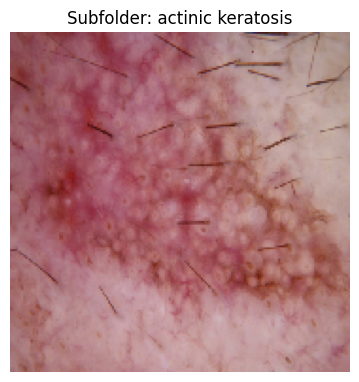

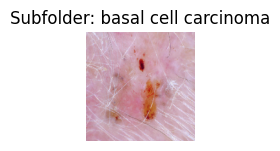

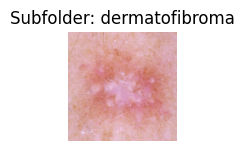

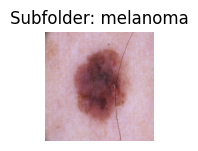

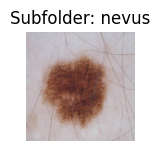

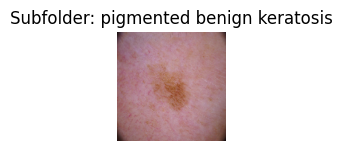

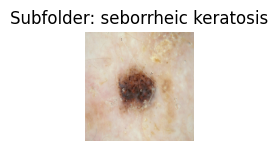

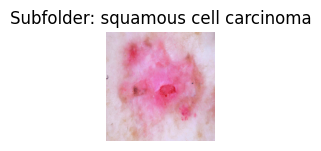

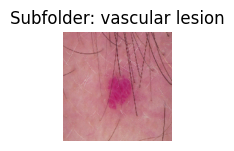

In [11]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

index = 0
plt.figure(figsize=(15,15))
# Visualize images from each subfolder
for subfolder in class_names:
    # Path to the current subfolder
    subfolder_path = os.path.join(data_dir_train, subfolder)

    # List of image files in the subfolder
    images = os.listdir(subfolder_path)

    # Choose a sample image from the subfolder
    sample_image = images[0]  # You can change this index to visualize different images

    # Load the image using keras.utils.load_img
    img = image.load_img(os.path.join(subfolder_path, sample_image),target_size=(180,180))

    # Plot the image
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(img)
    plt.title('Subfolder: ' + subfolder)
    plt.axis('off')
    plt.show()

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create the model**

In [13]:
# Create the model
#model has 3 convolutional layers and three fully connected layers
num_classes=9
model = tf.keras.Sequential([
    # Rescale pixel values to be in the range [0, 1]
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer to convert 3D feature maps to 1D
    layers.Flatten(),

    # First fully connected layer
    layers.Dense(64, activation='relu'),

    # Second fully connected layer
    layers.Dense(32, activation='relu'),

    # Third fully connected layer
    layers.Dense(16, activation='relu'),

    # Output layer with softmax activation for multiclass classification
    layers.Dense(num_classes, activation='softmax')
])


**Compile the model**

In [14]:
### choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        3

**Train the model**

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
506/506 [==============================] - 1395s 669ms/step - loss: 1.8028 - accuracy: 0.2837 - val_loss: 1.5318 - val_accuracy: 0.4260
Epoch 2/20
506/506 [==============================] - 11s 22ms/step - loss: 1.3740 - accuracy: 0.4751 - val_loss: 1.2532 - val_accuracy: 0.5204
Epoch 3/20
506/506 [==============================] - 11s 22ms/step - loss: 1.1447 - accuracy: 0.5652 - val_loss: 1.1833 - val_accuracy: 0.5577
Epoch 4/20
506/506 [==============================] - 11s 22ms/step - loss: 0.9357 - accuracy: 0.6627 - val_loss: 0.8244 - val_accuracy: 0.7018
Epoch 5/20
506/506 [==============================] - 11s 22ms/step - loss: 0.7370 - accuracy: 0.7374 - val_loss: 0.6555 - val_accuracy: 0.7756
Epoch 6/20
506/506 [==============================] - 11s 22ms/step - loss: 0.5878 - accuracy: 0.7913 - val_loss: 0.5692 - val_accuracy: 0.8003
Epoch 7/20
506/506 [==============================] - 11s 22ms/step - loss: 0.4828 - accuracy: 0.8267 - val_loss: 0.5028 - val_accura

**Visualizing training results**

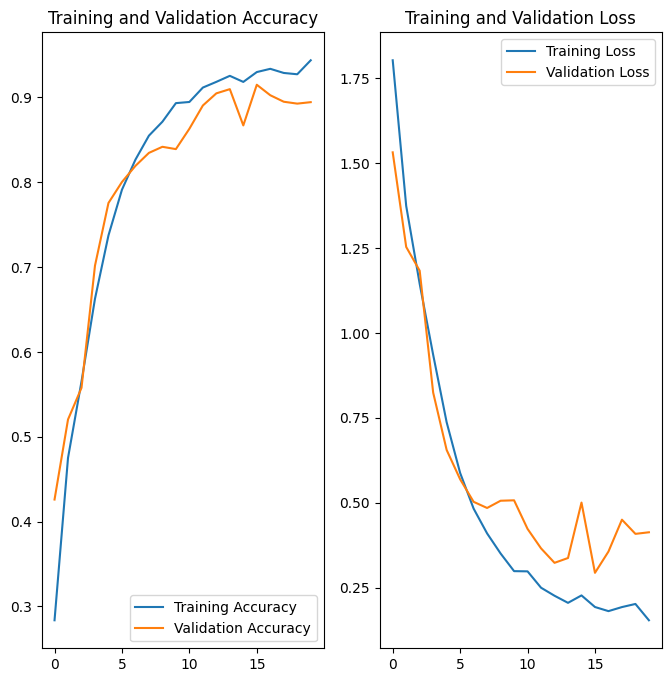

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Write your findings here**

In [ ]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

**Create the model, compile and train the model**

In [20]:
# Create the model
#model has 3 convolutional layers and three fully connected layers
num_classes=9
model = tf.keras.Sequential([
    # Rescale pixel values to be in the range [0, 1]
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer to convert 3D feature maps to 1D
    layers.Flatten(),

    # First fully connected layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    # Second fully connected layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),

    # Third fully connected layer
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),

    # Output layer with softmax activation for multiclass classification
    layers.Dense(num_classes, activation='softmax')
])


**Compiling the model**

In [21]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
#checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
#earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

**Training the model**

In [22]:

epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
506/506 [==============================] - 14s 22ms/step - loss: 2.1996 - accuracy: 0.1161 - val_loss: 2.1957 - val_accuracy: 0.1176
Epoch 2/20
506/506 [==============================] - 11s 22ms/step - loss: 2.1954 - accuracy: 0.1216 - val_loss: 2.1956 - val_accuracy: 0.1186
Epoch 3/20
506/506 [==============================] - 11s 22ms/step - loss: 2.1953 - accuracy: 0.1175 - val_loss: 2.1957 - val_accuracy: 0.1186
Epoch 4/20
506/506 [==============================] - 11s 22ms/step - loss: 2.1951 - accuracy: 0.1225 - val_loss: 2.1957 - val_accuracy: 0.1176
Epoch 5/20
506/506 [==============================] - 11s 22ms/step - loss: 2.1952 - accuracy: 0.1246 - val_loss: 2.1958 - val_accuracy: 0.1186
Epoch 6/20
506/506 [==============================] - 11s 22ms/step - loss: 2.1952 - accuracy: 0.1189 - val_loss: 2.1959 - val_accuracy: 0.1186
Epoch 7/20
506/506 [==============================] - 11s 22ms/step - loss: 2.1953 - accuracy: 0.1182 - val_loss: 2.1956 - val_accuracy:

**Visualizing the results**

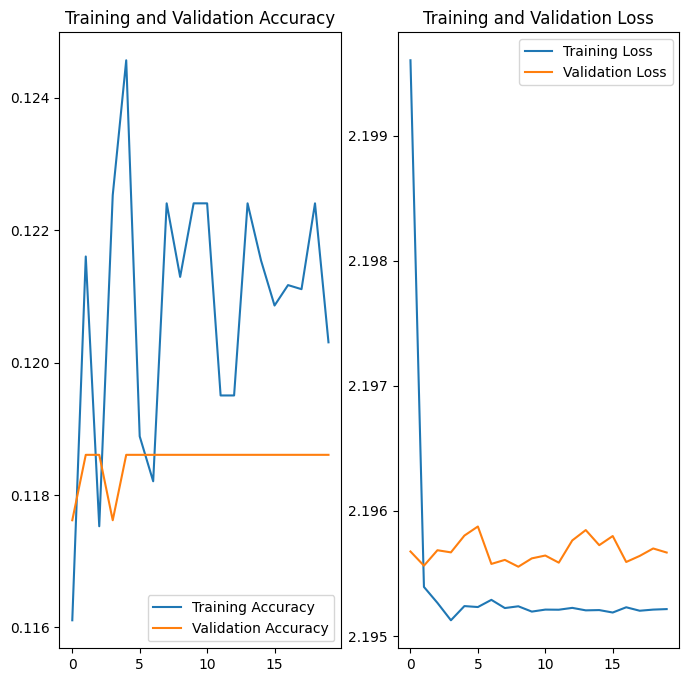

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Find the distribution of classes in the training dataset.

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,basal cell carcinoma,376
1,nevus,357
2,squamous cell carcinoma,181
3,actinic keratosis,114
4,dermatofibroma,95
5,melanoma,438
6,seborrheic keratosis,77
7,pigmented benign keratosis,462
8,vascular lesion,139


In [26]:
!pip install Augmentor

In [27]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF7F543DCF0>: 100%|██████████| 500/500 [00:04<00:00, 120.16 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF7F409B520>: 100%|██████████| 500/500 [00:04<00:00, 115.92 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF7F53D3220>: 100%|██████████| 500/500 [00:04<00:00, 124.45 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF7CC140310>: 100%|██████████| 500/500 [00:10<00:00, 45.87 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FF7F543E590>: 100%|██████████| 500/500 [00:09<00:00, 52.18 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF7F4183F40>: 100%|██████████| 500/500 [00:04<00:00, 118.15 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF7F41804F0>: 100%|██████████| 500/500 [00:05<00:00, 93.73 Samples/s] 


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF7EC412CE0>: 100%|██████████| 500/500 [00:04<00:00, 121.11 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF7F543DED0>: 100%|██████████| 500/500 [00:04<00:00, 124.12 Samples/s]


In [28]:

from glob import glob
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

22500


** Lets see the distribution of augmented data after adding new images to the original training data.**

In [29]:

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029524.jpg_85c8aee2-9f08-499d-bf33-8a880cb3f23c.jpg',
 '/content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027920.jpg_a0d0ea23-cfe7-47c2-9cc5-15b482e621e3.jpg',
 '/content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025301.jpg_45435817-511c-4b6c-8a82-d93c9299e273.jpg',
 '/content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025530.jpg_6ef3edcf-4b18-42e4-b87e-914a8ad35fb7.jpg',
 '/content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026528.jpg_d6651d99-689f-4f53-8001-e8a84275f133.jpg',
 '/content/gdrive/MyDrive/CASESTUDYDATA/SkinCancerTrain/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027425.jpg

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [31]:

path_list_new =[]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
original_df = pd.DataFrame({'Path': [], 'Label': []})
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = pd.concat([original_df, df2], ignore_index=True)

**Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?**

After rebalancing the classes, there is great improvement in validation data accuracy.The model is more general and not overfitting/underfitting.
